# Summary

Objective:
- Predict credit card defaulting 

Methods Used:
- Random Forest Classifier
- GridSearch CV

# Part 1: Data Processing

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

1. import data and verify shape is 30000,24

In [21]:
data = pd.read_csv(r'C:\Users\mhime\Downloads\default_data.csv', index_col = 0)

In [22]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
data.shape

(30000, 24)

2. remove any rows that have missing data

In [24]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

no NA values. if there were, dropna(axis = 0) would have been used

3. keep all columns besides target variable as predictors in X subset

In [49]:
X = data.iloc[:, 0:23].values

In [51]:
X

array([[ 20000,      2,      2, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 30000,      1,      2, ...,   4200,   2000,   3100],
       [ 80000,      1,      3, ...,   1926,  52964,   1804],
       [ 50000,      1,      2, ...,   1000,   1000,   1000]], dtype=int64)

In [53]:
y = data.iloc[:, 23].values

In [54]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

4. split data into train test split at 70/30 split.  

In [55]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42 )

# Part 2: Random Forest Classifier- Baseline Model

1. start by creating a simple random forest classifier using default parameters.  fit model on training data, use random_state

In [62]:
rf_cls = RandomForestClassifier(random_state = 0)

In [63]:
rf_cls.fit(X_train, y_train)

C:\Users\mhime\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

2. use fitted model to predict on test data. Use predict_proba() and predict() methods to get predicted probabilities as well as predicted classes

In [64]:
y_pred = rf_cls.predict(X_test)

In [65]:
y_pred_proba = rf_cls.predict_proba(X_test)

3. Calculate the confusion matrix and clasification report

In [66]:
from sklearn import metrics

In [79]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7040
           1       0.60      0.32      0.42      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000



In [69]:
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[6612  428]
 [1328  632]]


In [71]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_pred).ravel()

In [72]:
(tn, fp, fn, tp)

(6612, 428, 1328, 632)

4. Calculate the roc_auc score for the model

ROC_AUC score for the 1 class

In [75]:
print(sklearn.metrics.roc_auc_score(y_test, y_pred_proba[:,1]))

0.7251195428455472


ROC_AUC score for the 0 class

In [76]:
print(sklearn.metrics.roc_auc_score(y_test, y_pred_proba[:,0]))

0.27488045715445264


5. Calculate predictions for training data, build classification and roc_auc_score. Are there signs of overfitting? Why or why not?

In [80]:
y_pred_train = rf_cls.predict(X_train)

In [81]:
y_pred_proba_train = rf_cls.predict_proba(X_train)

In [82]:
print(sklearn.metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16324
           1       0.99      0.92      0.96      4676

    accuracy                           0.98     21000
   macro avg       0.99      0.96      0.97     21000
weighted avg       0.98      0.98      0.98     21000



In [83]:
print(sklearn.metrics.confusion_matrix(y_train, y_pred_train))

[[16297    27]
 [  368  4308]]


In [85]:
print(sklearn.metrics.roc_auc_score(y_train, y_pred_proba_train[:,1]))

0.9991012763041145


In [86]:
print(sklearn.metrics.roc_auc_score(y_train, y_pred_proba_train[:, 0]))

0.0008987236958854328


Pretty severe signs of overfitting. Drastically higher accuracy scores with training data fit than test data fit

# Part 3: Random Forest Classifier- Grid Search

1. Create a default random forest classifier.  Use GridSearchCV using the following params -- n_estimators: 50,100,500 max_features: 2,4,sqrt, max_depth: 6,8,10,12.  Feel free to try more params. Use 5 cross-folds. Use roc_auc for scoring.

In [87]:
rf = RandomForestClassifier()

In [88]:
param_grid = {'n_estimators': [50,100,500], 'max_features': [2,4,'sqrt'], 'max_depth': [6,8,10,12]}

In [89]:
grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring = 'roc_auc')

In [90]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [93]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 500}

In [139]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Check if higher max_features and n_estimators is better

In [99]:
param_grid_b = {'n_estimators': [500, 600, 700], 'max_features': [4, 6]}

In [100]:
grid_search_b = GridSearchCV(rf, param_grid_b, cv = 5, scoring = 'roc_auc')

In [101]:
grid_search_b.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [102]:
grid_search_b.best_params_

{'max_features': 4, 'n_estimators': 500}

Check if pasting is better than bootstrapping

In [105]:
param_grid_c = [{'n_estimators': [500], 'max_features': [4]},
    {'bootstrap': [False], 'n_estimators': [500], 'max_features': [4]}]

In [106]:
grid_search_c = GridSearchCV(rf, param_grid_c, cv = 5, scoring = 'roc_auc')

In [107]:
grid_search_c.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [111]:
grid_search_c.best_params_

{'max_features': 4, 'n_estimators': 500}

In [112]:
grid_search_c.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

2. Identify the best performing model

Best model was the first one tried (bootstrap = True, max_depth = 10, max_features - 4, n_estimators = 500)

In [113]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

3. Use best estimator model to predict on test data. Use predict_proba() and predict() methods

In [114]:
final_model = grid_search.best_estimator_

In [115]:
gs_y_pred = final_model.predict(X_test)

In [116]:
gs_y_pred_proba = final_model.predict_proba(X_test)

4. Calculate confusion matrix and classification report

In [117]:
print(sklearn.metrics.confusion_matrix(y_test, gs_y_pred))

[[6690  350]
 [1260  700]]


In [118]:
print(sklearn.metrics.classification_report(y_test, gs_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



5. Calculate roc_auc score

In [119]:
print(sklearn.metrics.roc_auc_score(y_test, gs_y_pred_proba[:,1]))

0.7745247999768089


In [120]:
print(sklearn.metrics.roc_auc_score(y_test, gs_y_pred_proba[:,0]))

0.22547520002319107


6. Calculate predictions for training data and build the confusion matrix, classificaiton report and roc_auc_score. Are there signs of overfitting? Why or why not?

In [121]:
gs_y_pred_train = final_model.predict(X_train)

In [122]:
gs_y_pred_proba_train = final_model.predict_proba(X_train)

In [125]:
print(sklearn.metrics.confusion_matrix(y_train, gs_y_pred_train))

[[15905   419]
 [ 2527  2149]]


In [126]:
print(sklearn.metrics.classification_report(y_train, gs_y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     16324
           1       0.84      0.46      0.59      4676

    accuracy                           0.86     21000
   macro avg       0.85      0.72      0.75     21000
weighted avg       0.86      0.86      0.84     21000



In [128]:
print(sklearn.metrics.roc_auc_score(y_train, gs_y_pred_proba_train[:,1]))

0.8639134135027456


In [129]:
print(sklearn.metrics.roc_auc_score(y_train, gs_y_pred_proba_train[:,0]))

0.13608658649725436


Although my hyperparameter tuning did not result in much higher prediciton strength, it reduces overfitting. The model still has signs of overfitting, but less than before.  And prediction strength is slightly improved

# Part 4: Create a feature importance plot for your best performing model

1. What are the top 5 features for this model?

In [131]:
feature_importances = final_model.feature_importances_

In [132]:
attributes = data.columns

In [133]:
attributes

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [134]:
sorted(zip(feature_importances, attributes), reverse = True)

[(0.23510464615322482, 'PAY_0'),
 (0.11303155642614177, 'PAY_2'),
 (0.06729220881264182, 'PAY_3'),
 (0.054101757808005975, 'PAY_4'),
 (0.042584042106408426, 'PAY_AMT1'),
 (0.040393014391362156, 'PAY_5'),
 (0.03744077405287619, 'BILL_AMT1'),
 (0.03695768673847182, 'LIMIT_BAL'),
 (0.033483434134106586, 'BILL_AMT2'),
 (0.03244472992325849, 'PAY_AMT2'),
 (0.03221344915440884, 'PAY_AMT3'),
 (0.030707875142218222, 'BILL_AMT3'),
 (0.029901720636565557, 'PAY_6'),
 (0.028798645428177703, 'BILL_AMT5'),
 (0.028629284751473423, 'AGE'),
 (0.02832574098111848, 'BILL_AMT6'),
 (0.027899804975825886, 'BILL_AMT4'),
 (0.02729637408708305, 'PAY_AMT6'),
 (0.02698520508131819, 'PAY_AMT4'),
 (0.02608097116501295, 'PAY_AMT5'),
 (0.009907273088541065, 'EDUCATION'),
 (0.006088465277145973, 'MARRIAGE'),
 (0.004331339684612581, 'SEX')]

In [136]:
indicies = np.argsort(feature_importances)

In [137]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x26db89ebcc0>,
 <a list of 23 Text yticklabel objects>)

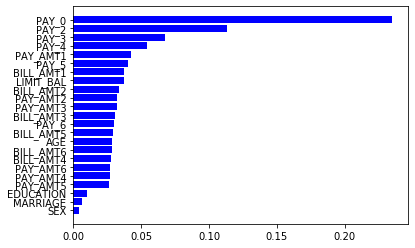

In [138]:
plt.figure(1)
plt.barh(range(len(indicies)), feature_importances[indicies], color = 'b')
plt.yticks(range(len(indicies)), attributes[indicies])

The top 5 features are Pay 0, Pay 2, Pay 3, Pay 4 and Pay AMT1

# Part 5: Conceptual Questions:

1. What are the best parameters from Grid Search in Question 3?  Does the model from Question 3 outperform the model from Question 2? Explain why

My best parameters were max_depth = 10 , n_estimators= 500, max_features = 4.  The model using these hyper parameters outperformed my model using default parameters.  My model from question 3 produced weighted average preceision and recall of 80/82, respectively, where the default model produced scores of 78/80.  Model 3 also produced better roc_auc scores.

2. Does Model 3 overfit data more or less than model 2? Explain why or why not

Model # 3 overfit the data less than model 2.  The gap between training set accuracy and test set accuracy was significantly reduced in model 3 compared to model 2.  This shows model 3 would be more generalizable than model 2 and have a lower variance.  This is a result of using Grid search to modify hyperparameters, including a reduction in max_depth

3. How does the Gini Index work?  How is it used to build a top performing model?

Gini Index is a measure of purity in a certain leaf node.  The purity is referring to the number of instances in the node belonging to each class.  Using this example, if a leaf node contained 100 instances of class 0, and 0 instances of class 1, or vice versa, that leaf node's gini index would be 0 (completely pure).  If there is a high Gini score in a node, that means it is very diverse and needs to be split further.  A top performing model would recognize this and tune hyperparameters further

4. Describe how Random Forest is different from bagging and why this difference can yield improved results

Random Forest can use bagging or pasting (pasting would be random sampling without replacement).  Random Forest also makes it easy to measure the relative importance of each feature, by measuring how much the tree nodes use that feature to reduce impurity, on average.  Additionally, Random Forest introduces extra randomness when growing trees, it searches for the best feature among a random subset of features, instead of searching for the best feature when splitting a node.  This introduces greater tree diversity and lowers the variance of the model.

5.  Describe the importance of the max_depth parameter in Random Forest.  How is the bias-variance tradeoff impacted by this parameter

Max_depth helps to control how much you should tailor your model to the data it was trained on, and how granular you should get in your tree's decisions.  A lower max_depth helps to reduce variance in your model because it reduces overfitting to your training data.  Other hyperparameters that can be lowered to reduce overfitting/variance are: max_leaf_nodes and max_features.  Hyperparameters that can be increased to reduced overfitting/variance are: min_samples_split and min_samples_leaf

6. Describe how k-fold cross validation works.  What benefit do we gain by using k-fold cross validation when tuning RandomForest models vs only using the train_test_split approach

K-fold cross validation splits the training set into k number of distince subsets (folds).  Then it trains and evaluates the model k times, picking a different fold for evaluation each time and training on the other k-1 folds.  It then produces k evaluation scores and helps you get an estimate of the performance of your model.  In these evaluation scores, the training set score is included as well.  This helps you understand early on if your model is overfitting and how accurate its predictions are.